<a href="https://colab.research.google.com/github/UlwanAl/KOMPUTER-GRAFIS/blob/main/PRAKTIKUM%203/Perspektif_Gbr_3D_G_211_24_0048.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

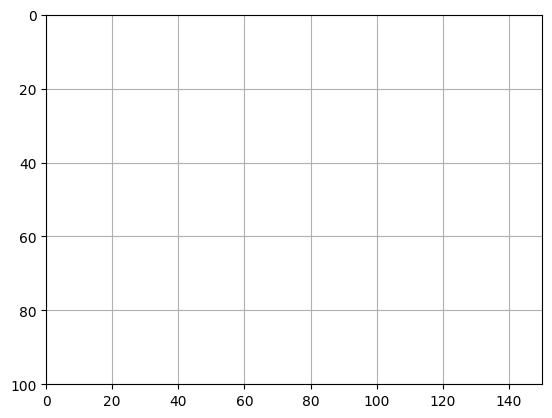

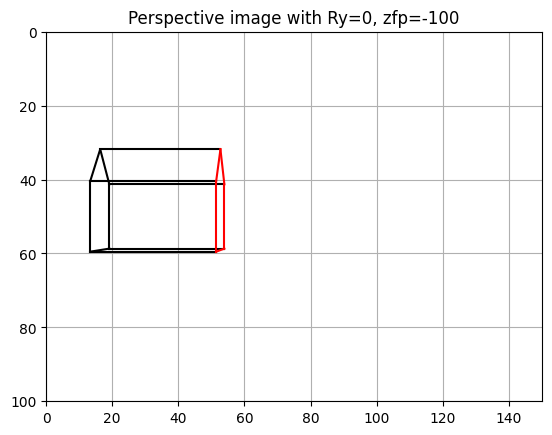

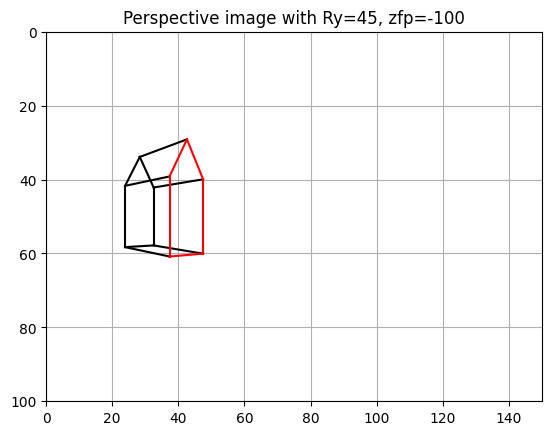

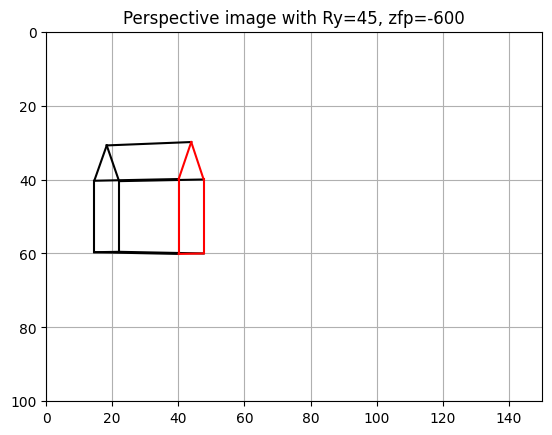

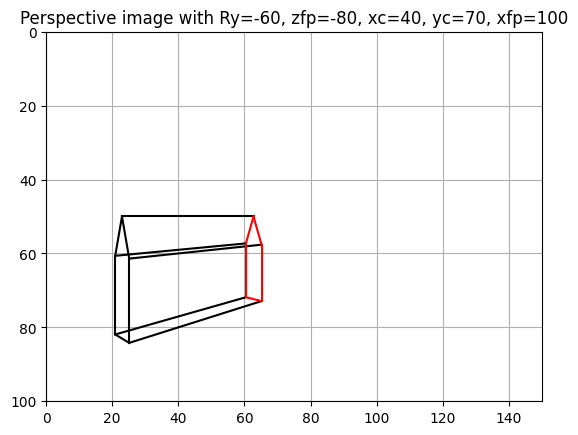

In [ ]:
# PERSPECTIVE

import matplotlib.pyplot as plt
import numpy as np
from math import sin, cos, radians

# Initialize plot
plt.figure() # Create a new figure for each plot
plt.axis([0,150,100,0])
plt.axis('on')
plt.grid(True)

# Object local corner coordinates
x=[-20,-20,20,20,-20,-20,20,20,-20,20]
y=[-10,-10,-10,-10,10,10, 10,10,-20,-20]
z=[5,-5,-5,5,5,-5,-5,5,0,0]

# Global coordinates - these will be modified by transformations
xg=[ ]
yg=[ ]
zg=[ ]

# -plot object
def plothouse(xg,yg,zg):
  plt.plot([xg[0],xg[3]],[yg[0],yg[3]],color='k')
  plt.plot([xg[1],xg[2]],[yg[1],yg[2]],color='k')
  plt.plot([xg[4],xg[7]],[yg[4],yg[7]],color='k')
  plt.plot([xg[5],xg[6]],[yg[5],yg[6]],color='k')
  plt.plot([xg[8],xg[9]],[yg[8],yg[9]],color='k')
  plt.plot([xg[4],xg[0]], [yg[4],yg[0]],color='k')
  plt.plot([xg[5],xg[1]], [yg[5],yg[1]],color='k')
  plt.plot([xg[6],xg[2]], [yg[6],yg[2]],color='r')
  plt.plot([xg[7],xg[3]],[yg[7],yg[3]],color='r')
  plt.plot([xg[0],xg[8]], [yg[0],yg[8]],color='k')
  plt.plot([xg[1],xg[8]], [yg[1],yg[8]],color='k')
  plt.plot([xg[2],xg[9]],[yg[2],yg[9]],color='r')
  plt.plot([xg[3],xg[9]],[yg[3],yg[9]],color='r')
  plt.plot([xg[4],xg[5]], [yg[4],yg[5]],color='k')
  plt.plot([xg[6],xg[7]], [yg[6],yg[7]],color='r')

# -rotate object about the Y direction
def roty(xc,yc,zc,x_local,y_local,z_local, Ry):
    # This function calculates the rotated coordinates relative to the center
    # It returns the new global coordinates
    a = [x_local, y_local, z_local]
    b = [cos(Ry), 0, sin(Ry)]
    xpp = np.inner(a, b)
    b = [0, 1, 0]
    ypp = np.inner(a, b)
    b = [-sin(Ry), 0, cos(Ry)]
    zpp = np.inner(a, b)
    return [xpp + xc, ypp + yc, zpp + zc]

def plothousey(xc,yc,zc,Ry):
   global xg, yg, zg # Declare global to modify the lists outside the function
   # Create new lists to store the rotated coordinates
   xg_rotated = []
   yg_rotated = []
   zg_rotated = []
   for i in range(len(x)): #rotate 10 corners
       # Call roty and append the returned coordinates to the new lists
       rotated_coords = roty(xc,yc,zc,x[i],y[i],z[i],Ry)
       xg_rotated.append(rotated_coords[0])
       yg_rotated.append(rotated_coords[1])
       zg_rotated.append(rotated_coords[2])
   # Update the global lists after all points are rotated
   xg = xg_rotated
   yg = yg_rotated
   zg = zg_rotated


#-perspective transformation
def perspective(xfp,yfp,zfp):
   global xg, yg, zg # Declare global to modify the lists outside the function

   for i in range(len(x)):
     a = xg[i] - xfp
     b = yg[i] - yfp

     # Check for division by zero before calculating q and qh
     if zg[i] + abs(zfp) == 0:
         # Handle this case, perhaps skip the point or assign a default value
         # For now, we'll skip the point to avoid error, or you might need a different approach
         # depending on the desired behavior when a point is on the focal plane z = -abs(zfp)
         # A common approach is to consider points on the focal plane to project to infinity
         print(f"Warning: Point {i} is on the focal plane. Skipping transformation.")
         continue

     c = zg[i] + abs (zfp)
     q = np.sqrt(a*a+b*b+c*c)

     # Check for division by zero for ux, uy, uz
     if q == 0:
          print(f"Warning: Distance q is zero for point {i}. Skipping transformation.")
          continue

     ux = a/q
     uy = b/q
     uz = c/q
     qh = q*abs(zfp)/(zg[i]+abs(zfp))
     xh = ux*qh + xfp
     yh = uy*qh + yfp
     zh = 0 # Points are projected onto the z=0 plane

     # Update the global lists
     xg[i] = xh
     yg[i] = yh
     zg[i] = zh

# --- Plot 1: Ry=0, zfp=-100 ---
plt.figure()
plt.axis([0,150,100,0])
plt.axis('on')
plt.grid(True)
plt.title('Perspective image with Ry=0, zfp=-100')

# Re-initialize xg, yg, zg based on the initial center (30, 50, 10)
xc=30
yc=50
zc=10
xg = []
yg = []
zg = []
for i in np.arange(len(x)):
   xg.append(x[i]+xc)
   yg.append(y[i]+yc)
   zg.append(z[i]+zc)

xfp=80
yfp=50
zfp=-100
Ry=radians(0)

# No rotation for Ry=0, so just apply perspective transformation
perspective(xfp,yfp,zfp)
plothouse(xg, yg, zg)
plt.show()


# --- Plot 2: Ry=45, zfp=-100 ---
plt.figure()
plt.axis([0,150,100,0])
plt.axis('on')
plt.grid(True)
plt.title('Perspective image with Ry=45, zfp=-100')

# Re-initialize xg, yg, zg based on the initial center (30, 50, 10)
xc=30
yc=50
zc=10
xg = []
yg = []
zg = []
for i in np.arange(len(x)):
   xg.append(x[i]+xc)
   yg.append(y[i]+yc)
   zg.append(z[i]+zc)

xfp=80
yfp=50
zfp=-100
Ry=radians(45)

plothousey(xc, yc, zc, Ry)    #--rotate
perspective(xfp,yfp,zfp)     #--transform
plothouse(xg, yg, zg)        #--plot the transformed points
plt.show()

# --- Plot 3: Ry=45, zfp=-600 ---
plt.figure()
plt.axis([0,150,100,0])
plt.axis('on')
plt.grid(True)
plt.title('Perspective image with Ry=45, zfp=-600')

# Re-initialize xg, yg, zg based on the initial center (30, 50, 10)
xc=30
yc=50
zc=10
xg = []
yg = []
zg = []
for i in np.arange(len(x)):
   xg.append(x[i]+xc)
   yg.append(y[i]+yc)
   zg.append(z[i]+zc)

xfp=80
yfp=50
zfp=-600 # Changed zfp
Ry=radians(45)

plothousey(xc, yc, zc, Ry)    #--rotate
perspective(xfp,yfp,zfp)     #--transform
plothouse(xg, yg, zg)        #--plot the transformed points
plt.show()

# --- Plot 4: Perspective image with Ry=-60, zfp=-100, xc=40, yc=70, xfp=100, zfp=-80 ---
# Note: zfp is listed twice in the comment, using the second value -80
plt.figure()
plt.axis([0,150,100,0])
plt.axis('on')
plt.grid(True)
plt.title('Perspective image with Ry=-60, zfp=-80, xc=40, yc=70, xfp=100')


# Re-initialize xg, yg, zg based on the new center (40, 70, 10)
xc=40 # New center x
yc=70 # New center y
zc=10 # Assuming zc remains 10 based on the object definition, but xc, yc are from the comment
xg = []
yg = []
zg = []
for i in np.arange(len(x)):
   xg.append(x[i]+xc)
   yg.append(y[i]+yc)
   zg.append(z[i]+zc)


xfp=100 # New focal point x
yfp=50 # Assuming yfp remains 50 as not specified in the comment
zfp=-80 # New focal point z
Ry=radians(-60) # New rotation angle

plothousey(xc, yc, zc, Ry)    #--rotate
perspective(xfp,yfp,zfp)     #--transform
plothouse(xg, yg, zg)        #--plot the transformed points
plt.show()